<a href="https://colab.research.google.com/github/ismailbeli/AirlinePassengerSatisfaction/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Passenger Satisfaction Prediction**
### Data Mining Project – Classification  
### Student Numbers and Names: B211202071 - İsmail BELİ / B231202355 - Yusuf Buğra KILIÇ

This project aims to predict passenger satisfaction using machine learning techniques.

Dataset source: Kaggle Airline Passenger Satisfaction Dataset

Dataset link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Analysis type: **Classification**

In this notebook:
- Data preprocessing  
- Exploratory data analysis  
- Feature encoding  
- Classification models(Random Forest and Logistic Regression)
- Model evaluation (Accuracy, F1-score, ROC Curve...)
- Feature importance
- Testing with unseen data
are performed.


***NOTE:** The dataset used in this study is a publicly available **Airline Passenger Satisfaction** dataset originally published on Kaggle.
For reproducibility and ease of access within this notebook, the same dataset is hosted on a public GitHub repository
and downloaded programmatically. The data content and structure are identical to the Kaggle version.*

## **Dataset Load**
The dataset is stored in a GitHub repository and loaded dynamically in this notebook.

In [1]:
import pandas as pd
import zipfile

GITHUB_ZIP_URL = "https://github.com/ismailbeli/AirlinePassengerSatisfaction/raw/refs/heads/main/test.csv.zip"
!wget -O dataset.zip $GITHUB_ZIP_URL

with zipfile.ZipFile("dataset.zip", "r") as z:
    z.extractall(".")

df = pd.read_csv("test.csv",index_col=0)
print("Dataset successfully loaded!")
df.head()

--2025-12-17 19:14:47--  https://github.com/ismailbeli/AirlinePassengerSatisfaction/raw/refs/heads/main/test.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ismailbeli/AirlinePassengerSatisfaction/refs/heads/main/test.csv.zip [following]
--2025-12-17 19:14:48--  https://raw.githubusercontent.com/ismailbeli/AirlinePassengerSatisfaction/refs/heads/main/test.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568687 (555K) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 555.36K  --.-KB/s    in 0.05s   

2025-12-17 19:14:48 (11.1 MB/s) - ‘datase

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


## **Dataset Review**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int64  


In [3]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [4]:
df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


The *Arrival Delay in Minutes* column includes null values. A missing value imputation technique was applied to avoid data loss by filling the missing entries with the median value.

In [5]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())
df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [6]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

cat_cols, num_cols

(Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object'),
 Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes',
        'Arrival Delay in Minutes'],
       dtype='object'))

## **Dataset Visualization**

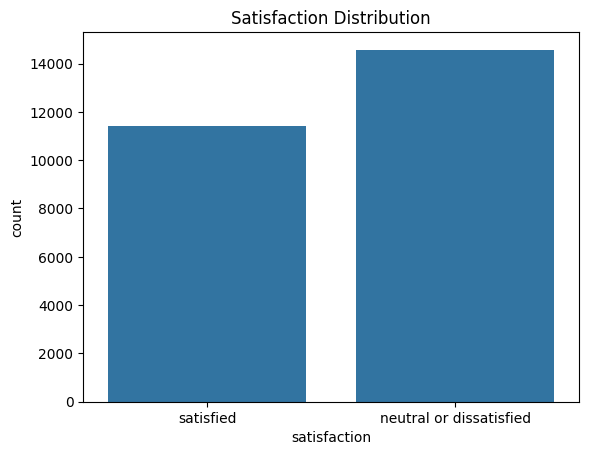

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="satisfaction")
plt.title("Satisfaction Distribution")
plt.show()


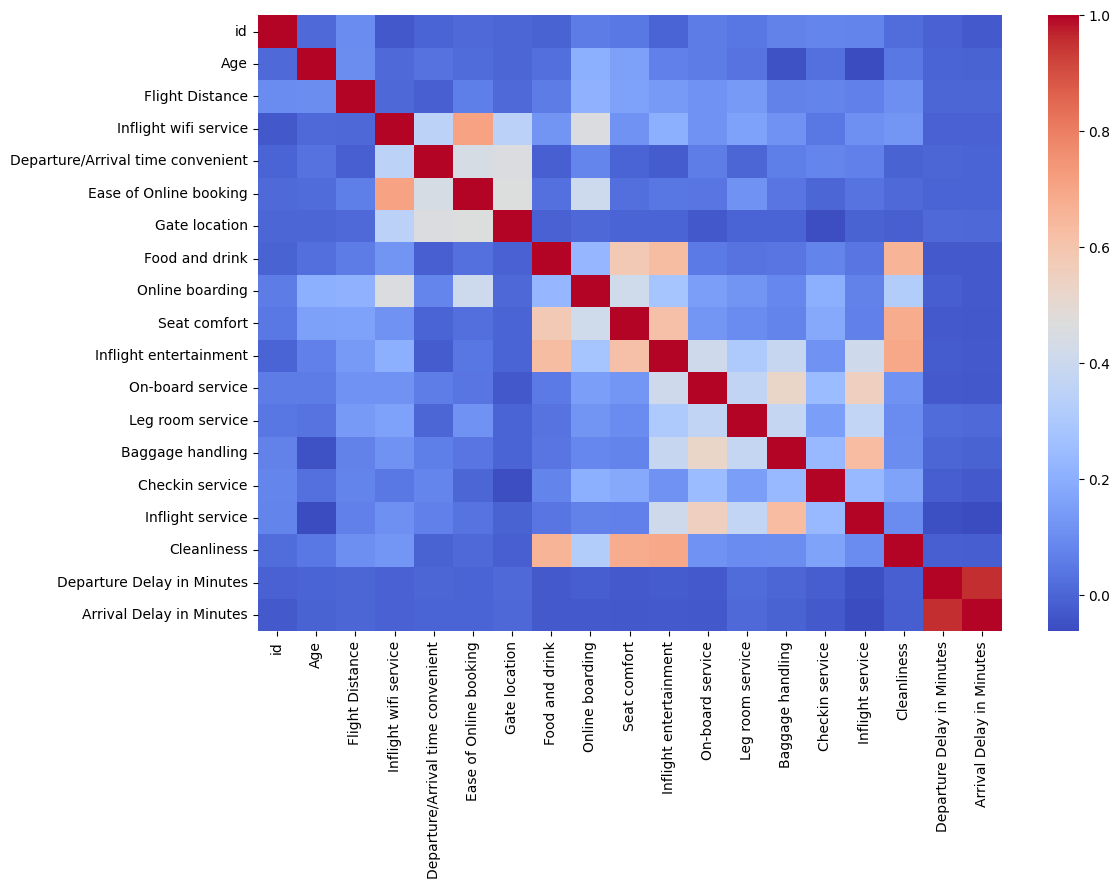

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm")
plt.show()


## **Data Preprocessing**

The categorical target variable *'satisfaction'* was converted into a numerical format to ensure model compatibility. Specifically, **'satisfied**' values were mapped to **1**, and **'neutral or dissatisfied'** values were mapped to **0**.

In [9]:
df["satisfaction"] = df["satisfaction"].map({
    "satisfied": 1,
    "neutral or dissatisfied": 0
})


**One-Hot Encoding**

In [10]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,19556,52,160,5,4,3,4,3,4,3,...,5,5,50,44.0,1,False,False,False,True,False
1,90035,36,2863,1,1,3,1,5,4,5,...,4,5,0,0.0,1,False,False,False,False,False
2,12360,20,192,2,0,2,4,2,2,2,...,2,2,0,0.0,0,True,True,False,True,False
3,77959,44,3377,0,0,0,2,3,4,4,...,1,4,0,6.0,1,True,False,False,False,False
4,36875,49,1182,2,3,4,3,4,1,2,...,2,4,0,20.0,1,False,False,False,True,False


**Train/Test Split**

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


*This step **standardizes** the input features to zero mean and unit variance, ensuring that all variables contribute equally to the learning process.
The transformation is learned exclusively from the training data to prevent data leakage and then applied to the test data, resulting in more stable and reliable model performance.*

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Models**

Two classification models were used in this project: **Random Forest** and **Logistic Regression**. Random Forest is an ensemble-based model that combines multiple decision trees to improve prediction performance and reduce overfitting, while Logistic Regression is a linear classification model that estimates class probabilities using a sigmoid function. Using both models allows for a comparison between a complex, non-linear approach and a simpler, more interpretable baseline model.

## **1. Logistic Regression**

Logistic Regression is a supervised classification model that applies a sigmoid function to a linear combination of input features to produce probability estimates. Due to its simple structure and high interpretability, it is commonly used as a baseline model for binary classification tasks.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression F1-score:", f1_score(y_test, y_pred_log), "\n")
print(classification_report(y_test, y_pred_log))

# Show random 5 test predictions
print(pd.DataFrame({"True": y_test.values, "LR_Pred": y_pred_log}).sample(5, random_state=42))


Logistic Regression Accuracy: 0.867590454195535
Logistic Regression F1-score: 0.8454627133872417 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2945
           1       0.86      0.84      0.85      2251

    accuracy                           0.87      5196
   macro avg       0.87      0.86      0.86      5196
weighted avg       0.87      0.87      0.87      5196

      True  LR_Pred
1334     0        0
79       1        0
3252     0        0
4378     1        1
4296     1        1


## **2. Random Forest Classifier**

Random Forest is an ensemble learning model that builds multiple decision trees using randomly selected subsets of data and features. The final prediction is obtained through majority voting across trees, which helps reduce overfitting and improves generalization performance. This model is effective in capturing non-linear relationships within the dataset.


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1-score:", f1_score(y_test, y_pred_rf), "\n")
print(classification_report(y_test, y_pred_rf))

# Show random 5 test predictions
print(pd.DataFrame({"True": y_test.values, "RF_Pred": y_pred_rf}).sample(5, random_state=42))

Random Forest Accuracy: 0.9499615088529638
Random Forest F1-score: 0.9417040358744395 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2945
           1       0.95      0.93      0.94      2251

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196

      True  RF_Pred
1334     0        0
79       1        1
3252     0        0
4378     1        1
4296     1        1


# **Confusion Matrices**

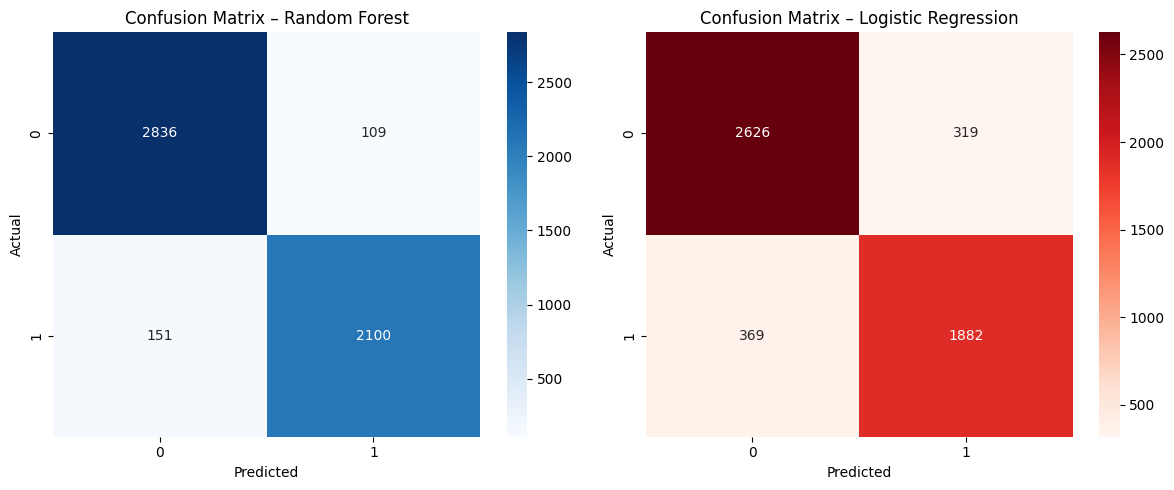

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix – Random Forest")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Confusion Matrix – Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


*The confusion matrices reveal that the Random Forest model achieves superior classification performance compared to Logistic Regression.
Specifically, Random Forest correctly classifies 2,836 negative instances and 2,100 positive instances, while producing only 109 false positives
and 151 false negatives. In contrast, Logistic Regression correctly identifies 2,626 negative and 1,882 positive samples, but yields higher
misclassification rates with 319 false positives and 369 false negatives. These results indicate that Random Forest provides more balanced and
accurate predictions.*

# **ROC Curve**

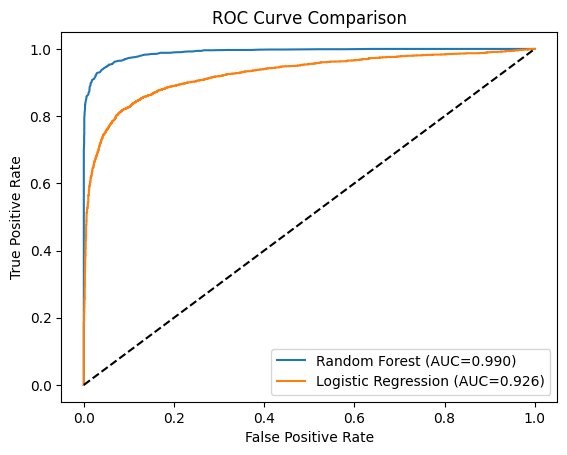

In [16]:
from sklearn.metrics import roc_curve, auc

# Random Forest
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Logistic Regression
y_prob_log = log_model.predict_proba(X_test)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={auc_log:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


The **ROC** (Receiver Operating Characteristic) curve illustrates the diagnostic ability of the classifier. The **AUC** (Area Under the Curve) score is {roc_auc:.3f}, which indicates that the model has a strong capability to distinguish between satisfied and neutral/dissatisfied passengers. The curve's proximity to the top-left corner demonstrates a high True Positive Rate and a low False Positive Rate.

# **Feature Importance**

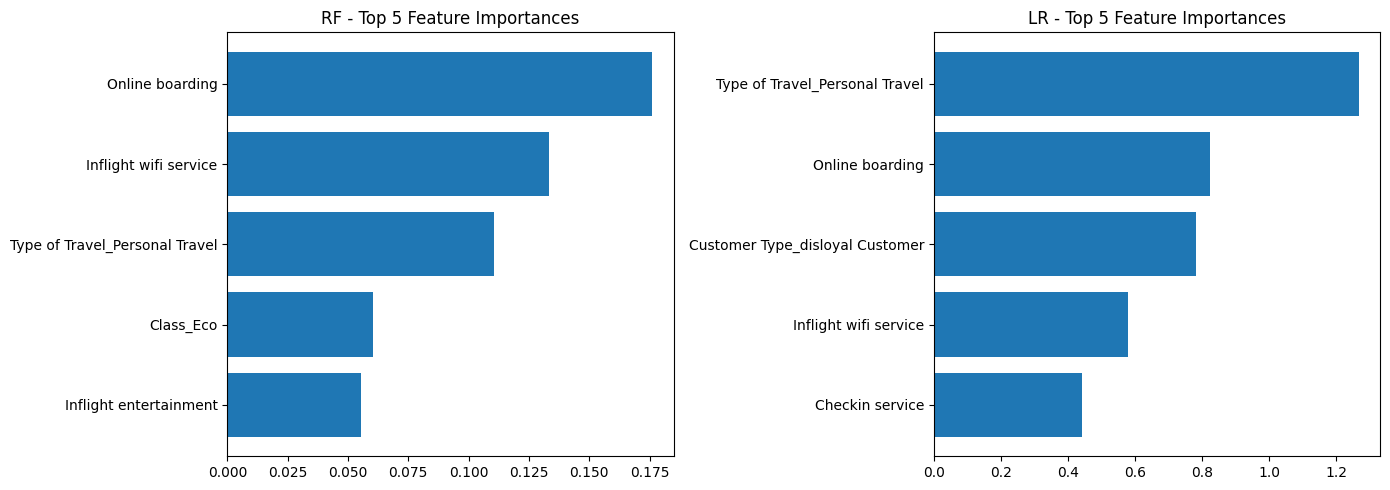

In [17]:
import matplotlib.pyplot as plt
import numpy as np

rf_importances = rf.feature_importances_
rf_indices = np.argsort(rf_importances)[-5:]

log_importances = np.abs(log_model.coef_[0])
log_indices = np.argsort(log_importances)[-5:]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Random Forest
axes[0].barh(
    range(len(rf_indices)),
    rf_importances[rf_indices]
)
axes[0].set_yticks(range(len(rf_indices)))
axes[0].set_yticklabels(X.columns[rf_indices])
axes[0].set_title("RF - Top 5 Feature Importances")

#Logistic Regression
axes[1].barh(
    range(len(log_indices)),
    log_importances[log_indices]
)
axes[1].set_yticks(range(len(log_indices)))
axes[1].set_yticklabels(X.columns[log_indices])
axes[1].set_title("LR - Top 5 Feature Importances")

plt.tight_layout()
plt.show()



*The x-axis values represent feature importance scores. For Random Forest, importance is calculated based on the reduction in Gini impurity, while for Logistic Regression, importance corresponds to the absolute value of model coefficients. These values indicate the relative contribution of each feature to the model’s decision process*

# **Testing the Model with New Passenger Samples**

In this section, new passenger profiles (not included in the training dataset)  
are created to evaluate how the trained models perform on unseen data.

The same preprocessing steps (encoding + scaling) are applied to the new samples  
to ensure that the input format matches the model requirements.

Both Logistic Regression and Random Forest models are used for prediction,  
and the probability of being "Satisfied" is also calculated.


In [18]:
# Example new passenger data
new_data = {
    "Gender": ["Female"],
    "Customer Type": ["Loyal Customer"],
    "Age": [28],
    "Type of Travel": ["Business travel"],
    "Class": ["Business"],
    "Flight Distance": [1500],
    "Inflight wifi service": [4],
    "Departure/Arrival time convenient": [3],
    "Ease of Online booking": [4],
    "Gate location": [2],
    "Food and drink": [4],
    "Online boarding": [5],
    "Seat comfort": [5],
    "Inflight entertainment": [4],
    "On-board service": [5],
    "Leg room service": [4],
    "Baggage handling": [5],
    "Checkin service": [4],
    "Cleanliness": [5],
    "Departure Delay in Minutes": [0],
    "Arrival Delay in Minutes": [0]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Ensure encoding matches training data
train_columns = X.columns
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

# Add missing columns as zeros
for col in train_columns:
    if col not in new_df_encoded.columns:
        new_df_encoded[col] = 0

# Arrange column order
new_df_encoded = new_df_encoded[train_columns]

# Apply scaling
new_scaled = scaler.transform(new_df_encoded)

# Predictions
log_pred = log_model.predict(new_scaled)[0]
rf_pred = rf.predict(new_scaled)[0]

log_proba = log_model.predict_proba(new_scaled)[0][1]
rf_proba = rf.predict_proba(new_scaled)[0][1]

print("LOGISTIC REGRESSION")
print("=" * len("LOGISTIC REGRESSION"))
print("Prediction:", "Satisfied" if log_pred == 1 else "Dissatisfied")
print("Probability (Satisfied):", round(log_proba, 4))

print("\nRANDOM FOREST")
print("=" * len("RANDOM FOREST"))
print("Prediction:", "Satisfied" if rf_pred == 1 else "Dissatisfied")
print("Probability (Satisfied):", round(rf_proba, 4))


LOGISTIC REGRESSION
Prediction: Satisfied
Probability (Satisfied): 0.9815

RANDOM FOREST
Prediction: Satisfied
Probability (Satisfied): 0.9


# **Results & Discussion**

- Random Forest performed better than Logistic Regression.
- The most important features for predicting satisfaction include:
  - Online boarding
  - Inflight wifi service
  - Type of Travel (Business,Personal)

## **Overall**

The model successfully predicts airline passenger satisfaction and can be used to improve service quality.

Two classification models, **Logistic Regression** and **Random Forest**, were evaluated for predicting passenger satisfaction.
The Random Forest model achieved higher overall performance compared to Logistic Regression, particularly in terms of accuracy and F1-score.
This improvement can be attributed to Random Forest's ability to model non-linear relationships and interactions between features.

Analysis of feature importance revealed that variables such as **Online Boarding**, **Inflight Wi-Fi Service**, and
**Seat Comfort** play a dominant role in determining passenger satisfaction. From an operational perspective, this suggests
that investments in digital services and onboard comfort may have a direct and significant impact on customer experience.

Although the results are promising, this study has certain limitations. The evaluation is based on a single train–test split,
and the dataset reflects historical passenger feedback, which may not fully capture changing expectations over time.
Future work may include hyperparameter optimization, cross-validation, and experimentation with advanced models
such as Gradient Boosting or XGBoost to further improve predictive performance.
